In [27]:
import os
os.chdir('/home/akhilbvs/Kaggle/World Happiness Report')

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [29]:
dataset = pd.read_csv('world-happiness-report-2019.csv')
dataset.shape

(156, 11)

In [30]:
dataset.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [32]:
dataset.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


In [33]:
dataset.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [34]:
dataset = dataset.fillna(method = "ffill")

In [35]:
dataset.isnull().sum()


Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             0
Negative affect             0
Social support              0
Freedom                     0
Corruption                  0
Generosity                  0
Log of GDP\nper capita      0
Healthy life\nexpectancy    0
dtype: int64

In [36]:
dataset.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.000000,0.539362,0.493430,0.520953,0.816842,0.546134,0.167937,0.495267,0.805525,0.817517
SD of Ladder,0.539362,1.000000,0.084565,0.619291,0.598782,0.251554,0.229271,0.392205,0.619254,0.612708
Positive affect,0.493430,0.084565,1.000000,0.388793,0.387075,0.681672,0.187625,0.354021,0.294125,0.331519
Negative affect,0.520953,0.619291,0.388793,1.000000,0.621412,0.430033,0.133937,0.338260,0.518583,0.498648
Social support,0.816842,0.598782,0.387075,0.621412,1.000000,0.449159,0.099864,0.442034,0.761414,0.737000
Freedom,0.546134,0.251554,0.681672,0.430033,0.449159,1.000000,0.336672,0.489772,0.380302,0.413306
Corruption,0.167937,0.229271,0.187625,0.133937,0.099864,0.336672,1.000000,0.234360,0.145649,0.107871
Generosity,0.495267,0.392205,0.354021,0.338260,0.442034,0.489772,0.234360,1.000000,0.472584,0.443207
Log of GDP\nper capita,0.805525,0.619254,0.294125,0.518583,0.761414,0.380302,0.145649,0.472584,1.000000,0.842964
Healthy life\nexpectancy,0.817517,0.612708,0.331519,0.498648,0.737000,0.413306,0.107871,0.443207,0.842964,1.000000


/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


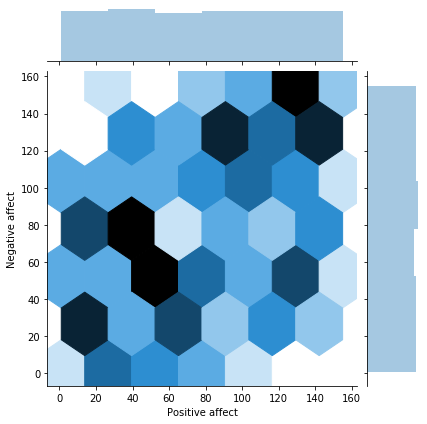

In [37]:
sns.jointplot('Positive affect','Negative affect',data=dataset,kind='hex')

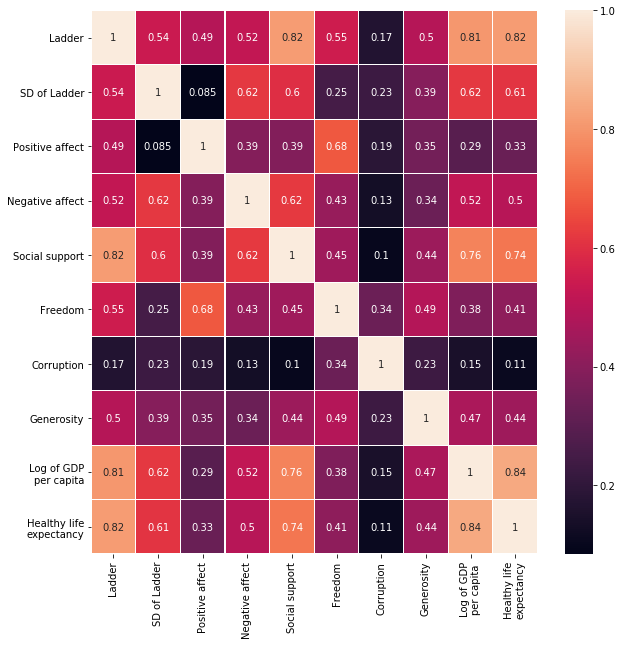

In [38]:
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(dataset.corr(), ax = ax, annot = True, linewidth = 0.05)
plt.show()

Text(0.5, 1.0, 'Positive Affect')

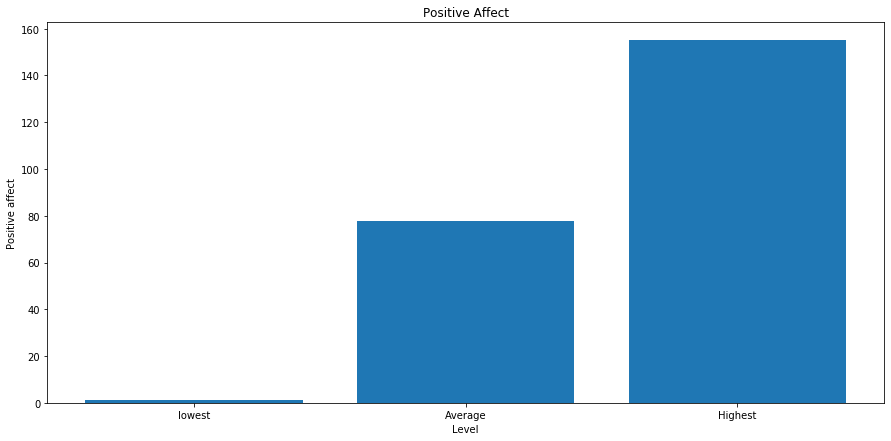

In [39]:
plt.figure(figsize=(15,7))
y = np.array([dataset['Positive affect'].min(), dataset['Positive affect'].mean(), dataset['Positive affect'].max()])
x = ['lowest', 'Average', 'Highest']
plt.bar(x,y)
plt.xlabel('Level')
plt.ylabel('Positive affect')
plt.title('Positive Affect')

Text(0.5, 1.0, 'Negative Affect')

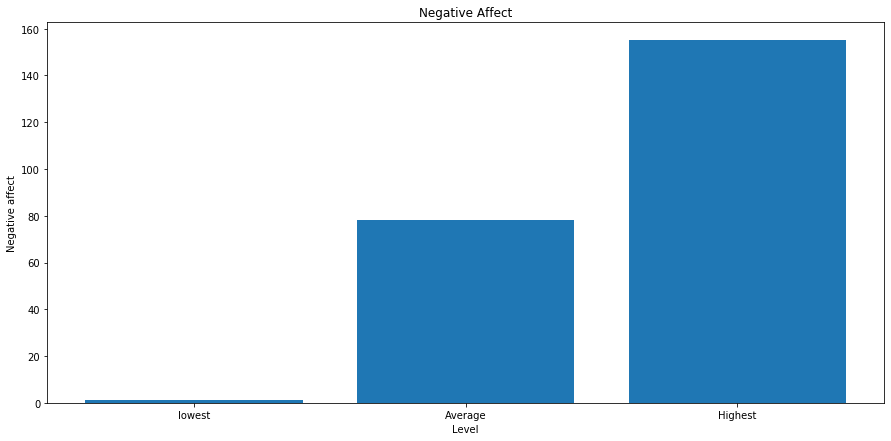

In [40]:
plt.figure(figsize=(15,7))
y = np.array([dataset['Negative affect'].min(), dataset['Negative affect'].mean(), dataset['Negative affect'].max()])
x = ['lowest', 'Average', 'Highest']
plt.bar(x,y)
plt.xlabel('Level')
plt.ylabel('Negative affect')
plt.title('Negative Affect')

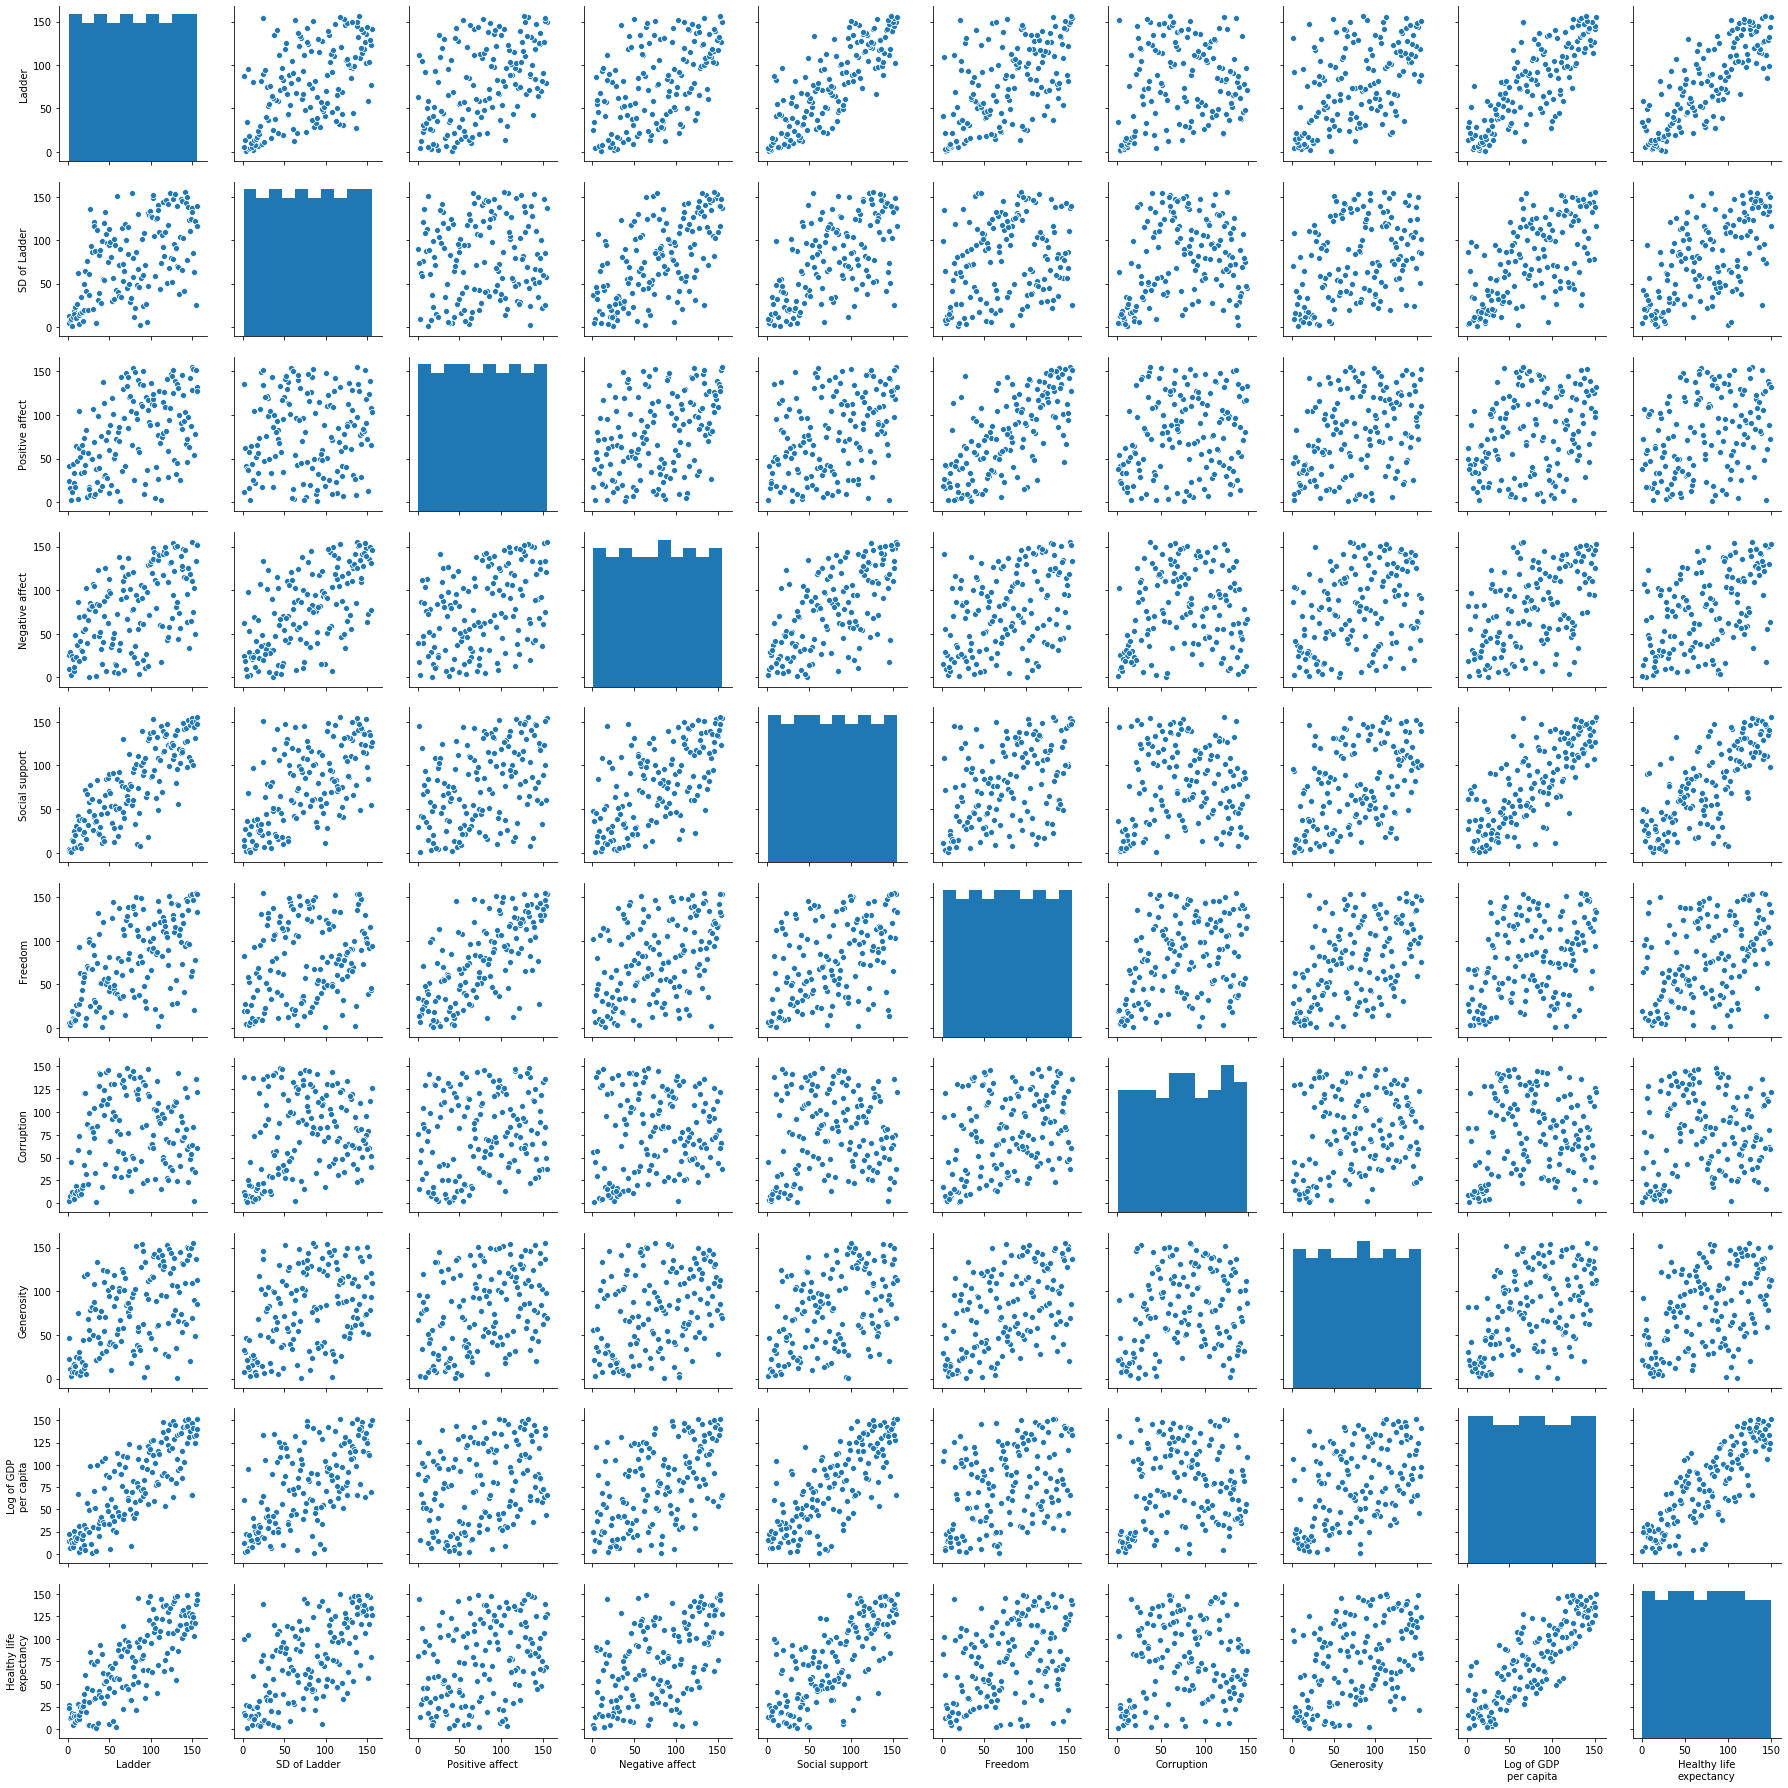

In [41]:
sns.pairplot(data = dataset)

                          Healthy life\nexpectancy
Country (region)                                  
Central African Republic                     150.0
Lesotho                                      149.0
Chad                                         148.0
Ivory Coast                                  147.0
Sierra Leone                                 146.0
Nigeria                                      145.0
Somalia                                      144.0
South Sudan                                  143.0
Mali                                         142.0
Cameroon                                     141.0


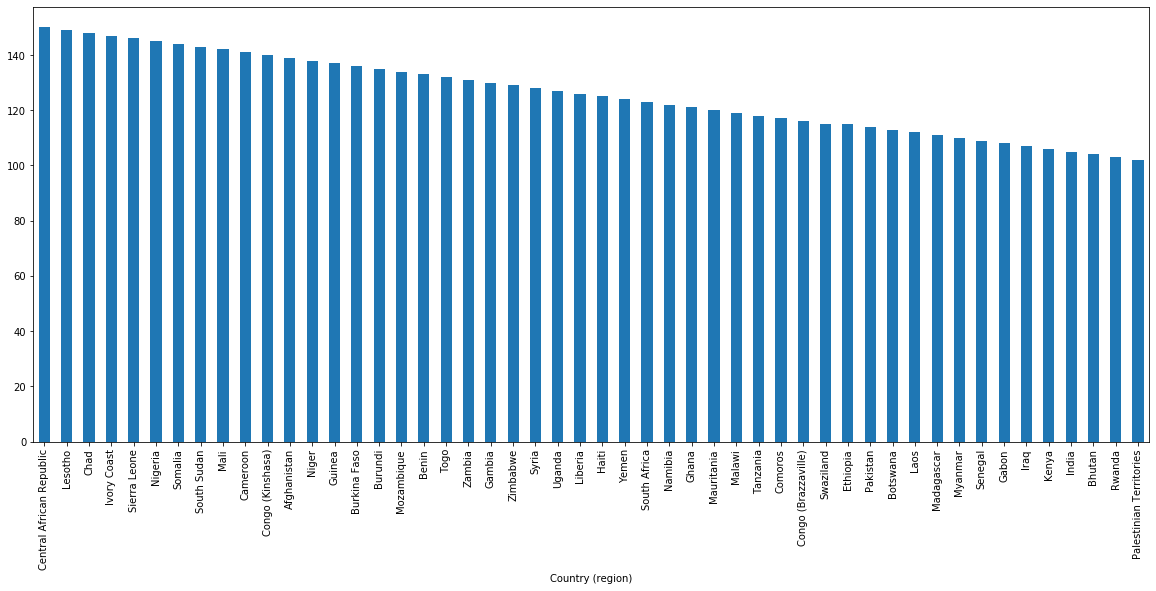

In [42]:
print(dataset[['Country (region)', 'Healthy life\nexpectancy']].groupby('Country (region)').mean().sort_values('Healthy life\nexpectancy', ascending=False).head(10))
country_wise = dataset[['Country (region)', 'Healthy life\nexpectancy']].groupby('Country (region)').mean().sort_values('Healthy life\nexpectancy', ascending=False).head(50)
country_wise.plot(kind = 'bar', legend=False,figsize=(20,8))
plt.show()

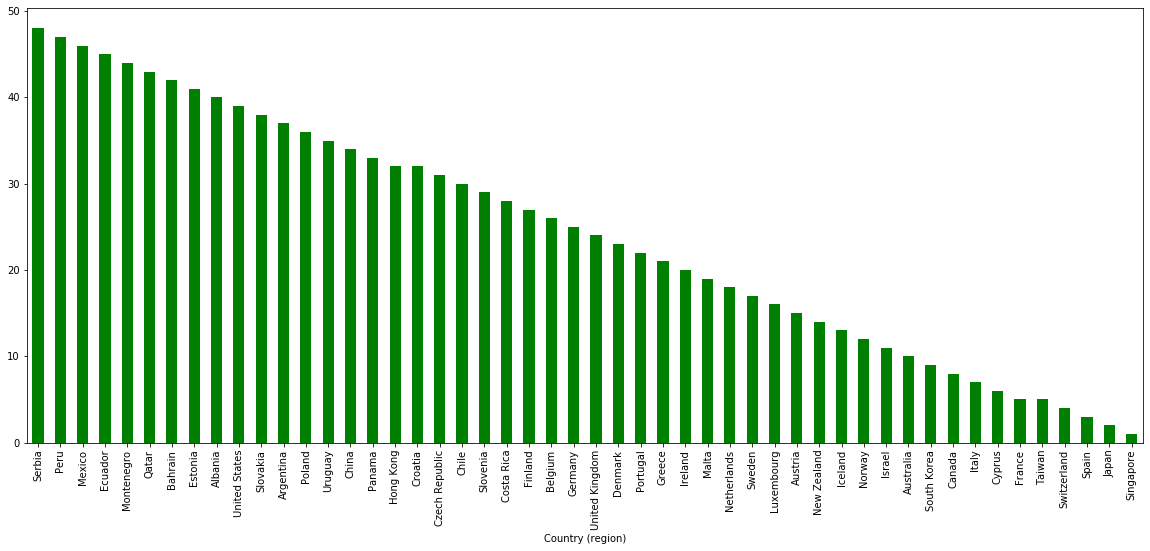

In [43]:
country_wise = dataset[['Country (region)', 'Healthy life\nexpectancy']].groupby('Country (region)').mean().sort_values('Healthy life\nexpectancy', ascending=False).tail(50)
country_wise.plot(kind = 'bar', legend=False,figsize=(20,8),color='green')
plt.show()

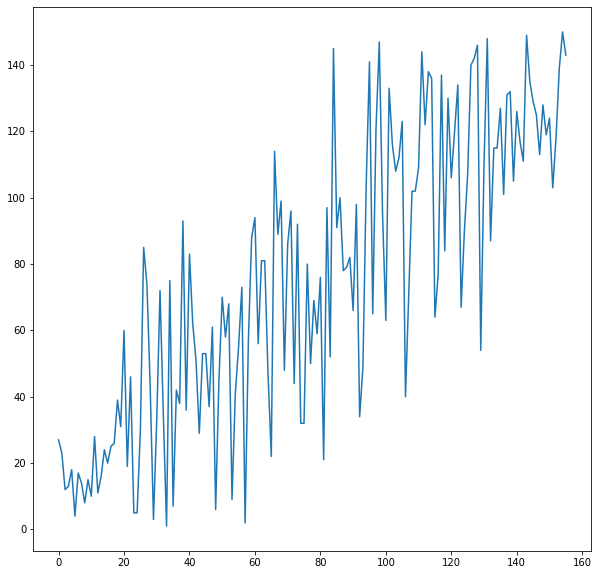

In [44]:
country_wise = dataset[["Country (region)", "Healthy life\nexpectancy"]]
country_wise.plot(kind = "line", legend =False, figsize = (10, 10))
plt.show()

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


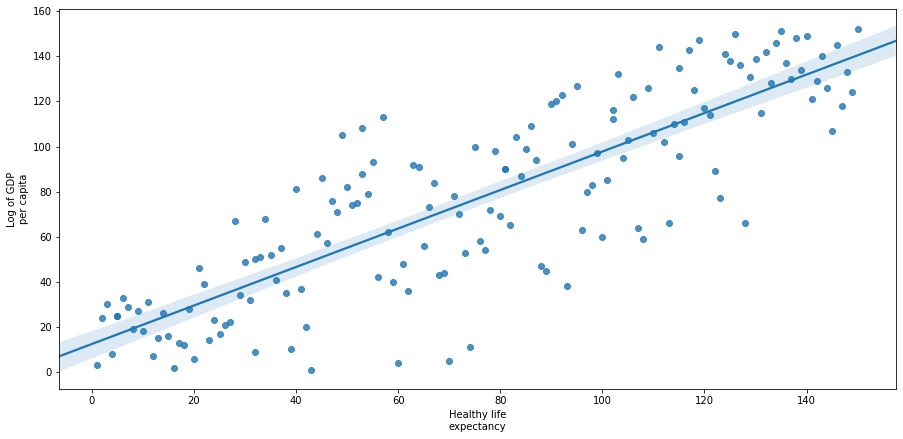

In [45]:
plt.figure(figsize = (15,7))
sns.regplot(x = 'Healthy life\nexpectancy', y ='Log of GDP\nper capita', data = dataset)
plt.show()

In [46]:
imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
dataset.iloc[:, 2:11] = imputer.fit_transform(dataset.iloc[:, 2:11])

In [47]:
dataset.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             0
Negative affect             0
Social support              0
Freedom                     0
Corruption                  0
Generosity                  0
Log of GDP\nper capita      0
Healthy life\nexpectancy    0
dtype: int64

In [48]:
X = dataset.iloc[:, 2:10]
y = dataset.iloc[:,-1]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

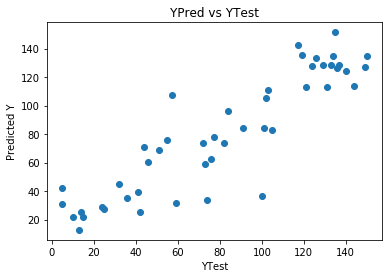

In [50]:

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
plt.scatter (y_test, y_pred)
plt.xlabel("YTest")
plt.ylabel("Predicted Y")
plt.title("YPred vs YTest")
plt.show()

In [51]:
score_regressor = r2_score(y_test,y_pred)

In [52]:
print('R2 score of Regression model: {}'.format(score_regressor))

R2 score of Regression model: 0.8054812175150015
